In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.feature_selection import chi2


warnings.filterwarnings('ignore')

/Users/oreayoisrael-bolarinwa/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install jinja2 3.0.0

ERROR: Could not find a version that satisfies the requirement 3.0.0 (from versions: none)
ERROR: No matching distribution found for 3.0.0
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [5]:
# check version number
import imblearn
print(imblearn.__version__)

0.10.1


In [6]:
table = "BRFSS_2021.csv"
df = pd.read_csv(table)

In [7]:
df.shape

(438693, 304)

In [8]:
df.head()

,Unnamed: 0,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,...,_FRTRES1,_VEGRES1,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1
0,0,1.0,1.0,b'01192021',b'01',b'19',b'2021',1100.0,b'2021000001',2.021000e+09,...,1.0,1.0,100.0,214.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79
1,1,1.0,1.0,b'01212021',b'01',b'21',b'2021',1100.0,b'2021000002',2.021000e+09,...,1.0,1.0,100.0,128.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79
2,2,1.0,1.0,b'01212021',b'01',b'21',b'2021',1100.0,b'2021000003',2.021000e+09,...,1.0,1.0,100.0,71.0,1.0,2.0,1.0,1.0,5.397605e-79,5.397605e-79
3,3,1.0,1.0,b'01172021',b'01',b'17',b'2021',1100.0,b'2021000004',2.021000e+09,...,1.0,1.0,114.0,165.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79
4,4,1.0,1.0,b'01152021',b'01',b'15',b'2021',1100.0,b'2021000005',2.021000e+09,...,1.0,1.0,100.0,258.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79


In [9]:
df = df.drop(['Unnamed: 0'], axis = 1)

In [10]:
df.shape

(438693, 303)

In [11]:
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_FRTRES1,_VEGRES1,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1
0,1.0,1.0,b'01192021',b'01',b'19',b'2021',1100.0,b'2021000001',2.021000e+09,1.0,...,1.0,1.0,100.0,214.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79
1,1.0,1.0,b'01212021',b'01',b'21',b'2021',1100.0,b'2021000002',2.021000e+09,1.0,...,1.0,1.0,100.0,128.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79
2,1.0,1.0,b'01212021',b'01',b'21',b'2021',1100.0,b'2021000003',2.021000e+09,1.0,...,1.0,1.0,100.0,71.0,1.0,2.0,1.0,1.0,5.397605e-79,5.397605e-79
3,1.0,1.0,b'01172021',b'01',b'17',b'2021',1100.0,b'2021000004',2.021000e+09,1.0,...,1.0,1.0,114.0,165.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79
4,1.0,1.0,b'01152021',b'01',b'15',b'2021',1100.0,b'2021000005',2.021000e+09,1.0,...,1.0,1.0,100.0,258.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79


In [12]:
# DIABETE4
# going to make this ordinal. 0 is for no diabetes or only during pregnancy, 1 is for pre-diabetes or borderline diabetes, 2 is for yes diabetes
# Remove all 7 (dont knows)
# Remove all 9 (refused)
df['DIABETE4'] = df['DIABETE4'].replace({3:0, 4:1})
df = df[df.DIABETE4 != 2]
df = df[df.DIABETE4 != 7]
df = df[df.DIABETE4 != 9]
df.DIABETE4.unique()

array([ 0.,  1., nan])

In [13]:
# ADDEPEV3
# Remove all 7 (dont knows)
# Remove all 9 (refused)

df['ADDEPEV3'] = df['ADDEPEV3'].replace({2:0})
df = df[df.ADDEPEV3 != 7]
df = df[df.ADDEPEV3 != 9]
df.ADDEPEV3.unique()

array([ 0.,  1., nan])

In [14]:
# EMPLOY1

df = df[df.EMPLOY1 != 9]
df.EMPLOY1.unique()

array([ 7.,  8.,  2.,  5.,  1.,  6.,  4., nan,  3.])

In [15]:
#_RFHYPE6
#Change 1 to 0 so it represetnts No high blood pressure and 2 to 1 so it represents high blood pressure
df['_RFHYPE6'] = df['_RFHYPE6'].replace({1:0, 2:1})
df = df[df._RFHYPE6 != 9]
df._RFHYPE6.unique()

array([0., 1.])

In [16]:
#TOLDHI3
# Change 2 to 0 because it is No
# Remove all 7 (dont knows)
# Remove all 9 (refused)
df['TOLDHI3'] = df['TOLDHI3'].replace({2:0})
df = df[df.TOLDHI3 != 7]
df = df[df.TOLDHI3 != 9]
df.TOLDHI3.unique()

array([ 1.,  0., nan])

In [17]:
#CHOLCHK3 - Checked Cholestrol Within Last 5 Years? 1 - Yes, 2 - No
# Change 3 to 0 and 2 to 0 for Not checked cholesterol in past 5 years
# Remove 9
df['CHOLCHK3'] = df['CHOLCHK3'].replace({1:0, 2:1, 3:1, 4:1, 5:1, 6:1, 7:0, 8:0})
df = df[df.CHOLCHK3 != 9]
df.CHOLCHK3.unique()

array([1., 0.])

In [18]:
#4 _BMI5 (no changes, just note that these are BMI * 100. So for example a BMI of 4018 is really 40.18)
df['_BMI5'] = df['_BMI5'].div(100).round(0)
df._BMI5.unique()

array([15., nan, 28., 33., 29., 24., 46., 23., 40., 27., 35., 18., 30.,
       25., 36., 22., 21., 44., 38., 31., 45., 26., 37., 14., 32., 20.,
       19., 34., 41., 43., 39., 16., 42., 50., 51., 17., 52., 47., 49.,
       56., 57., 48., 58., 61., 53., 63., 64., 54., 55., 68., 62., 13.,
       59., 89., 66., 77., 60., 87., 69., 72., 75., 67., 79., 71., 65.,
       94., 82., 86., 12., 70., 78., 74., 98., 73., 84., 76., 83., 80.,
       99., 88., 81., 92., 85., 90., 95., 91., 97.])

In [19]:
# SMOKE100 - Whether Individual currently smokes 
# Change 2 to 0 because it is No
# Remove all 7 (dont knows)
# Remove all 9 (refused)
df['_RFSMOK3'] = df['_RFSMOK3'].replace({1:0,2:1})
df = df[df['_RFSMOK3'] != 9]
df.SMOKE100.unique()

array([1., 2.])

In [20]:
#6 CVDSTRK3
# Change 2 to 0 because it is No
# Remove all 7 (dont knows)
# Remove all 9 (refused)
df['CVDSTRK3'] = df['CVDSTRK3'].replace({2:0})
df = df[df.CVDSTRK3 != 7]
df = df[df.CVDSTRK3 != 9]
df.CVDSTRK3.unique()

array([0., 1.])

In [21]:
#7 _MICHD
#Change 2 to 0 because this means did not have MI or CHD
df['_MICHD'] = df['_MICHD'].replace({2: 0})
df._MICHD.unique()

array([ 0.,  1., nan])

In [22]:
#_TOTINDA
# 1 for physical activity
# change 2 to 0 for no physical activity
# Remove all 9 (don't know/refused)
df['_TOTINDA'] = df['_TOTINDA'].replace({2:0})
df = df[df._TOTINDA != 9]
df._TOTINDA.unique()

array([0., 1.])

In [23]:
#_FRTLT1
# Change 2 to 0. this means no fruit consumed per day. 1 will mean consumed 1 or more pieces of fruit per day 
# remove all dont knows and missing 9
df['_FRTLT1A'] = df['_FRTLT1A'].replace({2:0})
df = df[df._FRTLT1A != 9]
df._FRTLT1A.unique()

array([1., 0.])

In [24]:
#_VEGLT1
# Change 2 to 0. this means no vegetables consumed per day. 1 will mean consumed 1 or more pieces of vegetable per day 
# remove all dont knows and missing 9
df['_VEGLT1A'] = df['_VEGLT1A'].replace({2:0})
df = df[df._VEGLT1A != 9]
df._VEGLT1A.unique()

array([1., 0.])

In [25]:
#_RFDRHV5
# Change 1 to 0 (1 was no for heavy drinking). change all 2 to 1 (2 was yes for heavy drinking)
# remove all dont knows and missing 9
df['_RFDRHV7'] = df['_RFDRHV7'].replace({1:0, 2:1})
df = df[df._RFDRHV7 != 9]
df._RFDRHV7.unique()

array([0., 1.])

In [26]:
#12 HLTHPLN
# 1 is yes, change 2 to 0 because it is No health care access
# remove 7 and 9 for don't know or refused
df['_HLTHPLN'] = df['_HLTHPLN'].replace({2:0})
df = df[df._HLTHPLN != 7]
df = df[df._HLTHPLN != 9]
df._HLTHPLN.unique()

array([1., 0.])

In [27]:
#13 MEDCOST
# Change 2 to 0 for no, 1 is already yes
# remove 7 for don/t know and 9 for refused
df['MEDCOST1'] = df['MEDCOST1'].replace({2:0})
df = df[df.MEDCOST1 != 7]
df = df[df.MEDCOST1 != 9]
df.MEDCOST1.unique()

array([ 0.,  1., nan])

In [28]:
#GENHLTH
# This is an ordinal variable that I want to keep (1 is Excellent -> 5 is Poor)
# Remove 7 and 9 for don't know and refused
df = df[df.GENHLTH != 7]
df = df[df.GENHLTH != 9]
df.GENHLTH.unique()

array([ 5.,  3.,  2.,  4.,  1., nan])

In [29]:
# MENTHLTH
# already in days so keep that, scale will be 0-30
# change 88 to 0 because it means none (no bad mental health days)
# remove 77 and 99 for don't know not sure and refused
df['MENTHLTH'] = df['MENTHLTH'].replace({88:0})
df = df[df.MENTHLTH != 77]
df = df[df.MENTHLTH != 99]
df.MENTHLTH.unique()

array([10.,  0.,  5., 25., 14.,  2.,  3.,  7., 30., 15., 20.,  8.,  1.,
        4., 28., 24., 21., 12.,  6., 22., 27.,  9., 18., 13., 17., 16.,
       19., 29., 23., 26., 11.])

In [30]:
#PHYSHLTH
# already in days so keep that, scale will be 0-30
# change 88 to 0 because it means none (no bad mental health days)
# remove 77 and 99 for don't know not sure and refused
df['PHYSHLTH'] = df['PHYSHLTH'].replace({88:0})
df = df[df.PHYSHLTH != 77]
df = df[df.PHYSHLTH != 99]
df.PHYSHLTH.unique()

array([20.,  0., 30., 25.,  1.,  4., 10.,  2.,  3., 15.,  8., 13., 14.,
        5.,  7.,  6., 24., 29., 18., 12.,  9., 16., 17., 26., 28., 21.,
       27., 11., 19., 23., 22., nan])

In [31]:
#17 DIFFWALK
# change 2 to 0 for no. 1 is already yes
# remove 7 and 9 for don't know not sure and refused
df['DIFFWALK'] = df['DIFFWALK'].replace({2:0})
df = df[df.DIFFWALK != 7]
df = df[df.DIFFWALK != 9]
df.DIFFWALK.unique()

array([0., 1.])

In [32]:
# SEX
# in other words - was respondent male at birth
# change 2 to 0 (female as 0). Male is 1
df['SEXVAR'] = df['SEXVAR'].replace({2:0})
df.SEXVAR.unique()

array([0., 1.])

In [33]:
#_AGEG5YR
# already ordinal. 1 is 18-24 all the way up to 13 wis 80 and older. 5 year increments.
# remove 14 because it is don't know or missing
df = df[df._AGEG5YR != 14]
df._AGEG5YR.unique()

array([11., 10.,  9., 12., 13.,  7.,  6.,  1.,  3.,  8.,  4.,  5.,  2.])

In [34]:
#20 EDUCA
# This is already an ordinal variable with 1 being never attended school or kindergarten only up to 6 being college 4 years or more
# Scale here is 1-6
# Remove 9 for refused:
df = df[df.EDUCA != 9]
df.EDUCA.unique()

array([4., 6., 3., 5., 2., 1.])

In [35]:
#21 INCOME2
# Variable is already ordinal with 1 being less than $10,000 all the way up to 8 being $75,000 or more
# Remove 77 and 99 for don't know and refused
df = df[df.INCOME3 != 77]
df = df[df.INCOME3 != 99]
df.INCOME3.unique()

array([ 5.,  3.,  7.,  4.,  6.,  8.,  1.,  2.,  9., 10., 11., nan])

In [36]:
df.shape

(276883, 303)

In [37]:
df = df[['DIABETE4','_RFHYPE6', 'TOLDHI3', 'CHOLCHK3', '_BMI5','_RFSMOK3', 
                                         'CVDSTRK3', '_MICHD', 
                                         '_TOTINDA', 
                                         '_FRTLT1A', '_VEGLT1A', 
                                         '_RFDRHV7', 
                                         '_HLTHPLN', 'MEDCOST1', 
                                         'GENHLTH', 'MENTHLTH', 'PHYSHLTH', 'DIFFWALK', 
                                         'SEXVAR', '_AGEG5YR', 'EDUCA', 'INCOME3',  "_IMPRACE", 'ADDEPEV3', 'EMPLOY1']]

In [38]:
df.shape

(276883, 25)

In [39]:
df.groupby(['DIABETE4']).size()

DIABETE4
0.0    234074
1.0     42809
dtype: int64

In [40]:
df.head()

,DIABETE4,_RFHYPE6,TOLDHI3,CHOLCHK3,_BMI5,_RFSMOK3,CVDSTRK3,_MICHD,_TOTINDA,_FRTLT1A,...,MENTHLTH,PHYSHLTH,DIFFWALK,SEXVAR,_AGEG5YR,EDUCA,INCOME3,_IMPRACE,ADDEPEV3,EMPLOY1
0,0.0,0.0,1.0,1.0,15.0,0.0,0.0,0.0,0.0,1.0,...,10.0,20.0,0.0,0.0,11.0,4.0,5.0,1.0,0.0,7.0
2,1.0,1.0,0.0,1.0,28.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,11.0,4.0,3.0,2.0,0.0,7.0
3,1.0,1.0,1.0,1.0,33.0,0.0,0.0,0.0,1.0,1.0,...,10.0,0.0,0.0,0.0,9.0,4.0,7.0,1.0,0.0,7.0
4,1.0,0.0,1.0,1.0,29.0,0.0,1.0,1.0,1.0,1.0,...,0.0,30.0,1.0,1.0,12.0,3.0,4.0,6.0,0.0,8.0
5,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,13.0,5.0,6.0,1.0,0.0,7.0


In [41]:
#Rename the columns to make them more readable
df = df.rename(columns = {'DIABETE4':'Diabetes', 
                                         '_RFHYPE6':'HighBP',  
                                         'TOLDHI3':'HighChol', 'CHOLCHK3':'CholCheck', 
                                         '_BMI5':'BMI', 
                                         '_RFSMOK3':'Smoker', 
                                         'CVDSTRK3':'Stroke', '_MICHD':'HeartDiseaseorAttack', 
                                         '_TOTINDA':'PhysActivity', '_HLTHPLN':'HealthPlan',
                                         '_FRTLT1A':'Fruits', '_VEGLT1A':"Veggies", 
                                         '_RFDRHV7':'HvyAlcoholConsump', 
                                         'HLTHPLN1':'AnyHealthcare', 'MEDCOST1':'NoDocbcCost', 
                                         'GENHLTH':'GenHlth', 'MENTHLTH':'MentHlth', 'PHYSHLTH':'PhysHlth', 'DIFFWALK':'DiffWalk', 
                                         'SEXVAR':'Sex', '_AGEG5YR':'Age', 'EDUCA':'Education', 'INCOME3':'Income', 
                          '_IMPRACE':'Race', 'ADDEPEV3':'Depression', 'EMPLOY1':'EmploymentStatus' })

In [42]:
df.head()

,Diabetes,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Race,Depression,EmploymentStatus
0,0.0,0.0,1.0,1.0,15.0,0.0,0.0,0.0,0.0,1.0,...,10.0,20.0,0.0,0.0,11.0,4.0,5.0,1.0,0.0,7.0
2,1.0,1.0,0.0,1.0,28.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,11.0,4.0,3.0,2.0,0.0,7.0
3,1.0,1.0,1.0,1.0,33.0,0.0,0.0,0.0,1.0,1.0,...,10.0,0.0,0.0,0.0,9.0,4.0,7.0,1.0,0.0,7.0
4,1.0,0.0,1.0,1.0,29.0,0.0,1.0,1.0,1.0,1.0,...,0.0,30.0,1.0,1.0,12.0,3.0,4.0,6.0,0.0,8.0
5,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,13.0,5.0,6.0,1.0,0.0,7.0


In [43]:
df.shape

(276883, 25)

In [44]:
df.groupby(['Sex']).size()

Sex
0.0    145188
1.0    131695
dtype: int64

In [45]:
df = df.dropna()
df.shape

(233149, 25)

In [46]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes,233149.0,0.167129,0.373092,0.0,0.0,0.0,0.0,1.0
HighBP,233149.0,0.419534,0.493484,0.0,0.0,0.0,1.0,1.0
HighChol,233149.0,0.403043,0.490510,0.0,0.0,0.0,1.0,1.0
CholCheck,233149.0,0.962861,0.189104,0.0,1.0,1.0,1.0,1.0
BMI,233149.0,28.943397,6.542591,12.0,24.0,28.0,32.0,99.0
Smoker,233149.0,0.122531,0.327899,0.0,0.0,0.0,0.0,1.0
Stroke,233149.0,0.039035,0.193679,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,233149.0,0.086979,0.281804,0.0,0.0,0.0,0.0,1.0
PhysActivity,233149.0,0.779386,0.414662,0.0,1.0,1.0,1.0,1.0
Fruits,233149.0,0.621071,0.485122,0.0,0.0,1.0,1.0,1.0


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 233149 entries, 0 to 438692
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes              233149 non-null  float64
 1   HighBP                233149 non-null  float64
 2   HighChol              233149 non-null  float64
 3   CholCheck             233149 non-null  float64
 4   BMI                   233149 non-null  float64
 5   Smoker                233149 non-null  float64
 6   Stroke                233149 non-null  float64
 7   HeartDiseaseorAttack  233149 non-null  float64
 8   PhysActivity          233149 non-null  float64
 9   Fruits                233149 non-null  float64
 10  Veggies               233149 non-null  float64
 11  HvyAlcoholConsump     233149 non-null  float64
 12  HealthPlan            233149 non-null  float64
 13  NoDocbcCost           233149 non-null  float64
 14  GenHlth               233149 non-null  float64
 15  MentH

In [48]:
# Code to save the cleaned dataset for use in the second notebook

# df.to_csv('cleaned_BRFSS.csv')

##### Diabetes - Data Exploration

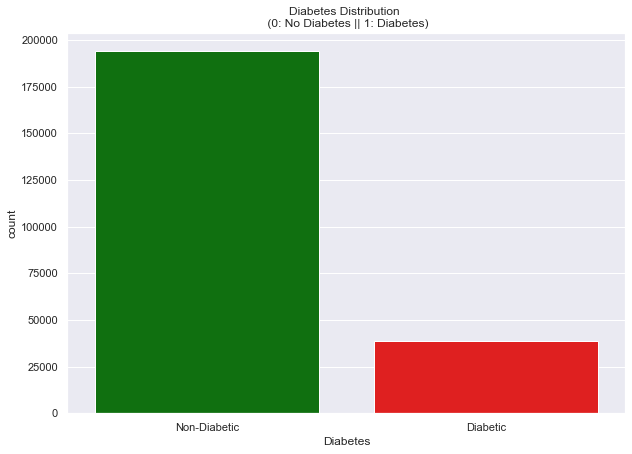

In [49]:
# Bar Chart displaying count by whether or not individuals have diabetes

%matplotlib inline

colors = ["#008000","#FF0000"]
ax = sns.set(rc={"figure.figsize":(10, 7)})
ax = sns.countplot(x = 'Diabetes', data = df, palette = colors)
ax.set_xticklabels(['Non-Diabetic', 'Diabetic'])
ax.set(title = 'Diabetes Distribution \n (0: No Diabetes || 1: Diabetes)')

plt.show()

In [50]:
# Separate df by whether or not individuals have diabetes

df_diabetes = df[df['Diabetes'] == 1]

df_no_diabetes = df[df['Diabetes'] == 0]
 

In [51]:
df.shape

(233149, 25)

In [52]:
df_diabetes_count = df_diabetes['Diabetes'].count()

df_no_diabetes_count = df_no_diabetes['Diabetes'].count()

print("Individuals with Diabetes:", df_diabetes_count)

print("Individuals without Diabetes:", df_no_diabetes_count)

Individuals with Diabetes: 38966
Individuals without Diabetes: 194183


In [53]:
print("Individuals with Diabetes:", (df_diabetes_count)*100/(df_diabetes_count + df_no_diabetes_count),"%\n")

print("Individuals without Diabetes:", (df_no_diabetes_count)*100/(df_diabetes_count + df_no_diabetes_count),"%")

Individuals with Diabetes: 16.712917490531805 %

Individuals without Diabetes: 83.28708250946819 %


##### Gender

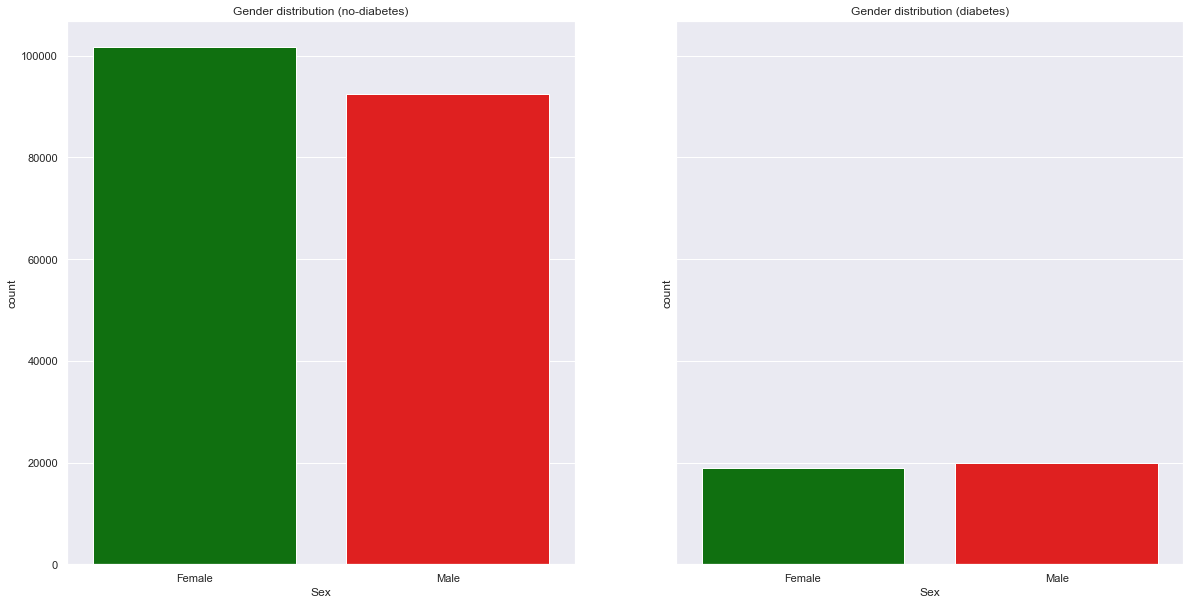

In [54]:
# Gender Distribution of Diabetes

colors = ["#008000","#FF0000"]

fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(20,10))

ax1 = sns.countplot(x = 'Sex', ax=ax1, data = df_no_diabetes, palette = colors)
ax1.set(title = 'Gender distribution (no-diabetes)')
ax1.set_xticklabels(['Female', 'Male'])

ax2 = sns.countplot(x = 'Sex', ax=ax2, data = df_diabetes, palette = colors)
ax2.set(title = 'Gender distribution (diabetes)')
ax2.set_xticklabels(['Female', 'Male'])

plt.show()

In [55]:
contigency = pd.crosstab(df["Diabetes"], df["Sex"])

contigency

chi2, p_value_1, dof, exp_freq = chi2_contingency(contigency)

if p_value_1 < 0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p_value_1    

reject null hypothesis


5.109333468495899e-41

##### Age

[Text(0, 0, '18-24'),
 Text(1, 0, '25-29'),
 Text(2, 0, '30-34'),
 Text(3, 0, '35-39'),
 Text(4, 0, '40-44'),
 Text(5, 0, '45-49'),
 Text(6, 0, '50-54'),
 Text(7, 0, '55-59'),
 Text(8, 0, '60-64'),
 Text(9, 0, '65-69'),
 Text(10, 0, '70-74'),
 Text(11, 0, '75-79'),
 Text(12, 0, '>80')]

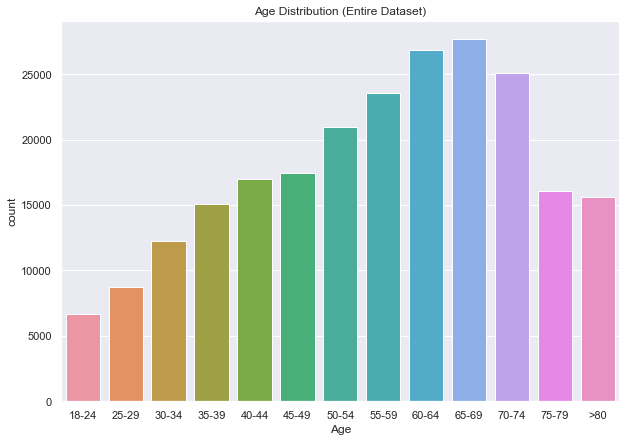

In [56]:
# Age dist. of whole dataset

ax = sns.countplot(data = df, x = "Age")

ax.set(title = 'Age Distribution (Entire Dataset)')

ax.set_xticklabels(['18-24', '25-29', '30-34', '35-39', 
'40-44', '45-49', '50-54', '55-59', '60-64', '65-69', 
'70-74', '75-79', '>80'])

[Text(0, 0, '18-24'),
 Text(1, 0, '25-29'),
 Text(2, 0, '30-34'),
 Text(3, 0, '35-39'),
 Text(4, 0, '40-44'),
 Text(5, 0, '45-49'),
 Text(6, 0, '50-54'),
 Text(7, 0, '55-59'),
 Text(8, 0, '60-64'),
 Text(9, 0, '65-69'),
 Text(10, 0, '70-74'),
 Text(11, 0, '75-79'),
 Text(12, 0, '>80')]

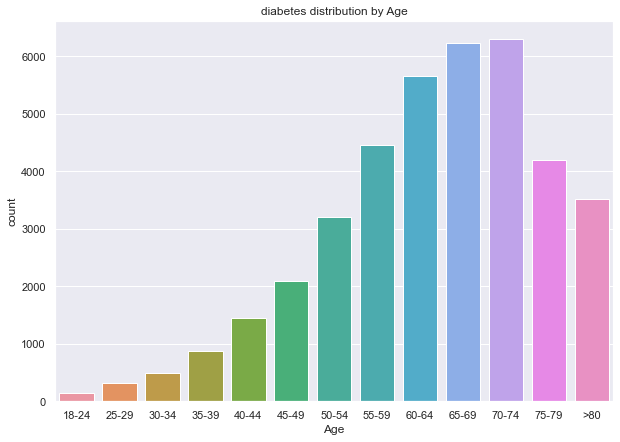

In [57]:
# Age dist. of diabetics

ax = sns.countplot(data = df_diabetes, x = "Age")

ax.set(title = 'diabetes distribution by Age')

ax.set_xticklabels(['18-24', '25-29', '30-34', '35-39', 
'40-44', '45-49', '50-54', '55-59', '60-64', '65-69', 
'70-74', '75-79', '>80'])

[Text(0, 0, '18-24'),
 Text(1, 0, '25-29'),
 Text(2, 0, '30-34'),
 Text(3, 0, '35-39'),
 Text(4, 0, '40-44'),
 Text(5, 0, '45-49'),
 Text(6, 0, '50-54'),
 Text(7, 0, '55-59'),
 Text(8, 0, '60-64'),
 Text(9, 0, '65-69'),
 Text(10, 0, '70-74'),
 Text(11, 0, '75-79'),
 Text(12, 0, '>80')]

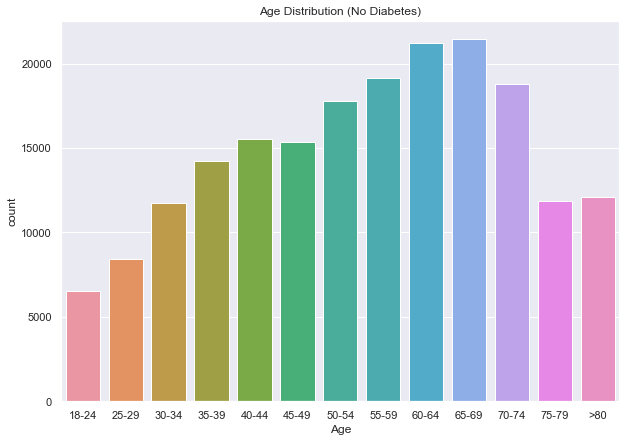

In [58]:
# Age dist. of non-diabetics

ax = sns.countplot(data = df[df["Diabetes"] == 0], x = "Age")

ax.set(title = 'Age Distribution (No Diabetes)')

ax.set_xticklabels(['18-24', '25-29', '30-34', '35-39', 
'40-44', '45-49', '50-54', '55-59', '60-64', '65-69', 
'70-74', '75-79', '>80'])

### Continuous Variables

#### BMI

(10.0, 65.0)

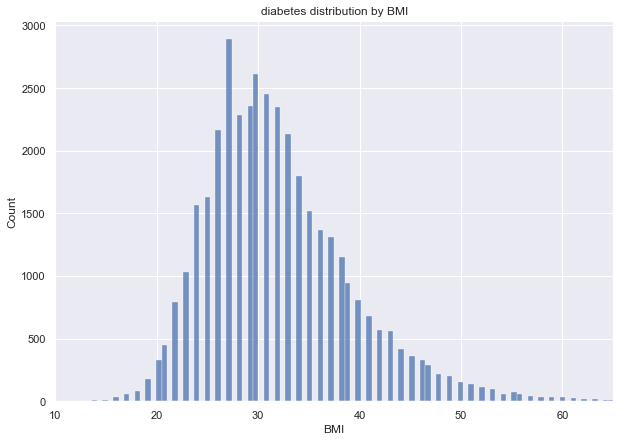

In [59]:
# Hist plot for BMI

ax = sns.histplot(data = df_diabetes, x = "BMI")

ax.set(title = 'diabetes distribution by BMI')

plt.xlim(10,65)

(10.0, 65.0)

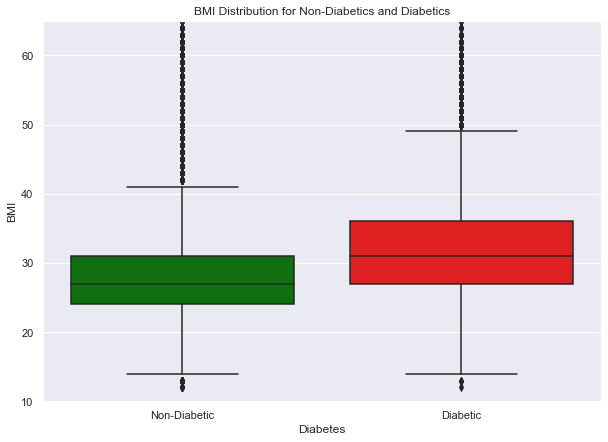

In [60]:
# Boxplot for BMI

colors = ["#008000","#FF0000"]

ax = sns.boxplot(data=df, x='Diabetes', y='BMI', palette = colors)

ax.set(title = 'BMI Distribution for Non-Diabetics and Diabetics')
ax.set_xticklabels(['Non-Diabetic', 'Diabetic'])
plt.ylim(10,65)

In [61]:
# Find mean for BMI in diabetic and non-diabetic groups

BMI_diabetes_mean = df_diabetes['BMI'].mean()

BMI_no_diabetes_mean = df_no_diabetes['BMI'].mean()

In [62]:
print("Average BMI for diabetic:", BMI_diabetes_mean)

print("Average BMI for non-diabetic:", BMI_no_diabetes_mean)

Average BMI for diabetic: 32.07873530770415
Average BMI for non-diabetic: 28.31423966052641


Running T Test to determine whether there is a significant difference in BMI between diabetics and non-diabetics

In [63]:
# Hypothesis Test - do non-diabetics and diabetics have the same BMI (95% confidence level)

BMI_diabetes = df_diabetes['BMI']

BMI_no_diabetes = df_no_diabetes['BMI']

ttest,p_value_1  = stats.ttest_ind(BMI_diabetes, BMI_no_diabetes)

if p_value_1 < 0.05:
    print("reject null hypothesis")
else:
    print("accept null")

reject null hypothesis


#### Mental Health Days

(0.0, 30.0)

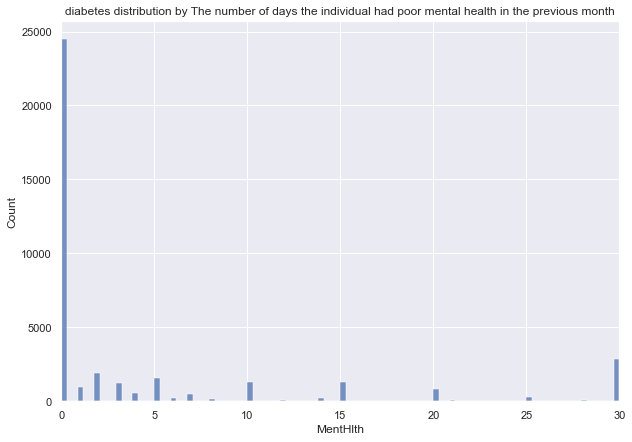

In [64]:
# Hist plot for Mental Health Days 

ax = sns.histplot(data = df_diabetes, x = "MentHlth")

ax.set(title = 'diabetes distribution by The number of days the individual had poor mental health in the previous month')

plt.xlim(0,30)

In [65]:
# Find mean for Poor Mental Health Days in diabetic and non-diabetic groups

MentHlth_diabetes_mean = df_diabetes['MentHlth'].mean()

MentHlth_no_diabetes_mean = df_no_diabetes['MentHlth'].mean()

In [66]:
print("Average Poor Mental Health Days for diabetics:", MentHlth_diabetes_mean)

print("Average Poor Mental Health Days for non-diabetics:", MentHlth_no_diabetes_mean)

Average Poor Mental Health Days for diabetics: 4.631858543345481
Average Poor Mental Health Days for non-diabetics: 3.7645262458608633


Running T Test to determine whether there is a significant difference in days in previous month with poor mental health between diabetics and non-diabetics

In [67]:
# Hypothesis Test - do non-diabetics and diabetics have the same level of mental health (95% confidence level)

MentHlth_diabetes = df_diabetes['MentHlth']

MentHlth_no_diabetes = df_no_diabetes['MentHlth']

ttest,p_value_2  = stats.ttest_ind(MentHlth_diabetes, MentHlth_no_diabetes)

if p_value_2 < 0.05:
    print("reject null hypothesis")
else:
    print("accept null")
    
p_value_2    

reject null hypothesis


5.896492265691021e-88

##### Physical Health

(0.0, 30.0)

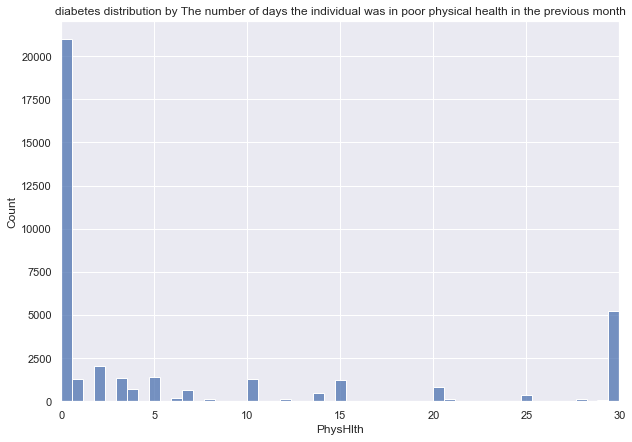

In [68]:
# PhysHlth

ax = sns.histplot(data = df_diabetes, x = "PhysHlth")

ax.set(title = 'diabetes distribution by The number of days the individual was in poor physical health in the previous month')

plt.xlim(0,30)



In [69]:
# Find mean for Poor Physical Health Days in diabetic and non-diabetic groups

PhysHlth_diabetes_mean = df_diabetes['PhysHlth'].mean()

PhysHlth_no_diabetes_mean = df_no_diabetes['PhysHlth'].mean()

In [70]:
print("Average Number of Days with poor physical health for diabetics:", PhysHlth_diabetes_mean)

print("Average Number of Days with poor physical health for non-diabetics:", PhysHlth_no_diabetes_mean)

Average Number of Days with poor physical health for diabetics: 6.703151465380075
Average Number of Days with poor physical health for non-diabetics: 3.1521760401270966


Running T Test to determine whether there is a significant difference in days in previous month with poor physical health between diabetics and non-diabetics

In [71]:
# Hypothesis Test - do non-diabetics and diabetics have the same level of physical health (95% confidence level)

PhysHlth_diabetes = df_diabetes['PhysHlth']

PhysHlth_no_diabetes = df_no_diabetes['PhysHlth']

ttest,p_value_3 = stats.ttest_ind(PhysHlth_diabetes, PhysHlth_no_diabetes)

if p_value_3 < 0.05:
    print("reject null hypothesis")
else:
    print("accept null")
    
p_value_3    

reject null hypothesis


0.0

#### Compiled T Test Results

In [72]:
# Compile T Tests into a dataframe

data = {'BMI': ['BMI', BMI_no_diabetes_mean, BMI_diabetes_mean ,p_value_1], 
       'Physical Health': ['PhysHlth', PhysHlth_no_diabetes_mean, PhysHlth_diabetes_mean, p_value_2],
       'Mental Health' : ['MentHlth', MentHlth_no_diabetes_mean, MentHlth_diabetes_mean, p_value_3]}

df_comp = pd.DataFrame(data)
df_comp = df_comp.rename(index = {0 : 'Variable Name',
                                  1 : 'Mean (No Diabetes)',
                                  2 : 'Mean (Diabetes)',
                                  3 : 'p value (t-test)',
                                  
})

df_comp = df_comp.sort_values(by = 'p value (t-test)', axis = 1, ascending = True)

df_comp_T = df_comp.transpose()

df_comp_T['Hypothesis'] = " "



for i in range(len(df_comp_T)):
    if df_comp_T['p value (t-test)'][i] < 0.05:
        df_comp_T['Hypothesis'][i] = 'Reject Null Hypothesis'
    else:
        df_comp_T['Hypothesis'][i] = 'Accept Null Hypothesis'
        
df_comp_T        

,Variable Name,Mean (No Diabetes),Mean (Diabetes),p value (t-test),Hypothesis
BMI,BMI,28.31424,32.078735,0.0,Reject Null Hypothesis
Mental Health,MentHlth,3.764526,4.631859,0.0,Reject Null Hypothesis
Physical Health,PhysHlth,3.152176,6.703151,0.0,Reject Null Hypothesis


In [73]:
# code to convert above df to csv

# df_comp_T.to_csv('t tests.csv')

### Dummy/Grouped Variables

In [74]:
dummy_variables = df.columns.values.tolist()

drop_names = ['Diabetes','BMI','PhysHlth', 'MentHlth']

for i in range(len(drop_names)):
    dummy_variables.remove(drop_names[i])

dummy_variables

['HighBP',
 'HighChol',
 'CholCheck',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'HealthPlan',
 'NoDocbcCost',
 'GenHlth',
 'DiffWalk',
 'Sex',
 'Age',
 'Education',
 'Income',
 'Race',
 'Depression',
 'EmploymentStatus']

In [75]:
data_chi2 = {}
h0 = " "

In [76]:
# Running CHI^2 tests for dummy variables

def chi_check(var1, var2, significance_level=None):
  tab_class = pd.crosstab(df[var1], df[var2], margins=True)
  tab_values = np.array([tab_class.iloc[0].values,
                  tab_class.iloc[1].values])
  stat, p, dof, expected_value= chi2_contingency(tab_values)
  print(var2)
  print("p value: " + str(p)) 
  if p <= significance_level: 
    print('Reject NULL HYPOTHESIS\n') 
    h0 = 'Reject NULL HYPOTHESIS' 
  else:
    print('ACCEPT NULL HYPOTHESIS\n')
    h0 = 'ACCEPT NULL HYPOTHESIS' 
  data_chi2[var2] = [p, h0] 

In [77]:
for i in range(len(dummy_variables)):
    chi_check('Diabetes',dummy_variables[i],significance_level=0.05)

HighBP
p value: 0.0
Reject NULL HYPOTHESIS

HighChol
p value: 0.0
Reject NULL HYPOTHESIS

CholCheck
p value: 2.1571416474106385e-273
Reject NULL HYPOTHESIS

Smoker
p value: 0.0005291192852727106
Reject NULL HYPOTHESIS

Stroke
p value: 0.0
Reject NULL HYPOTHESIS

HeartDiseaseorAttack
p value: 0.0
Reject NULL HYPOTHESIS

PhysActivity
p value: 0.0
Reject NULL HYPOTHESIS

Fruits
p value: 7.26229207832389e-48
Reject NULL HYPOTHESIS

Veggies
p value: 3.4458784067436144e-112
Reject NULL HYPOTHESIS

HvyAlcoholConsump
p value: 1.950506179591353e-171
Reject NULL HYPOTHESIS

HealthPlan
p value: 6.2757304488979976e-30
Reject NULL HYPOTHESIS

NoDocbcCost
p value: 7.204390858375877e-19
Reject NULL HYPOTHESIS

GenHlth
p value: 0.0
Reject NULL HYPOTHESIS

DiffWalk
p value: 0.0
Reject NULL HYPOTHESIS

Sex
p value: 8.015921798014835e-40
Reject NULL HYPOTHESIS

Age
p value: 0.0
Reject NULL HYPOTHESIS

Education
p value: 0.0
Reject NULL HYPOTHESIS

Income
p value: 0.0
Reject NULL HYPOTHESIS

Race
p value:

In [78]:
df_comp_chi2 = pd.DataFrame(data_chi2)
df_comp_chi2 = df_comp_chi2.rename(index = {0 : 'p value (chi2-test)',
                                  1 : 'Hypothesis'
                                                                  
})

df_comp_chi2 = df_comp_chi2.sort_values(by = 'p value (chi2-test)', axis = 1, ascending = True)

df_comp_chi2_T = df_comp_chi2.transpose()

df_comp_chi2_T

,p value (chi2-test),Hypothesis
HighBP,0.0,Reject NULL HYPOTHESIS
Income,0.0,Reject NULL HYPOTHESIS
Education,0.0,Reject NULL HYPOTHESIS
Age,0.0,Reject NULL HYPOTHESIS
DiffWalk,0.0,Reject NULL HYPOTHESIS
GenHlth,0.0,Reject NULL HYPOTHESIS
EmploymentStatus,0.0,Reject NULL HYPOTHESIS
HeartDiseaseorAttack,0.0,Reject NULL HYPOTHESIS
Stroke,0.0,Reject NULL HYPOTHESIS
HighChol,0.0,Reject NULL HYPOTHESIS


In [79]:
# code to convert above df to csv

# df_comp_chi2_T.to_csv('chi2 test.csv')

##### High Cholestrol

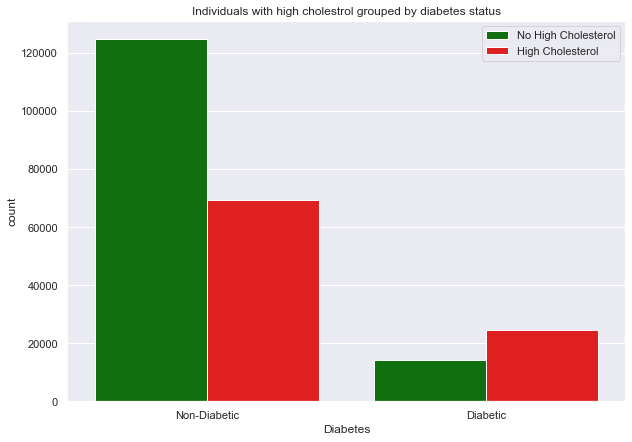

In [80]:
# HighChol

colors = ["#008000","#FF0000"]

ax = sns.countplot(data = df, x = 'Diabetes', hue='HighChol', 
palette = colors)

ax.set(title = 'Individuals with high cholestrol grouped by diabetes status')
ax.set_xticklabels(['Non-Diabetic', 'Diabetic'])
ax.legend(['No High Cholesterol', 'High Cholesterol'])


In [81]:
df_HighChol = df.groupby(["Diabetes", "HighChol"]).size().reset_index(name="Count")

df_HighChol

,Diabetes,HighChol,Count
0,0.0,0.0,124812
1,0.0,1.0,69371
2,1.0,0.0,14368
3,1.0,1.0,24598


##### High Blood Pressure

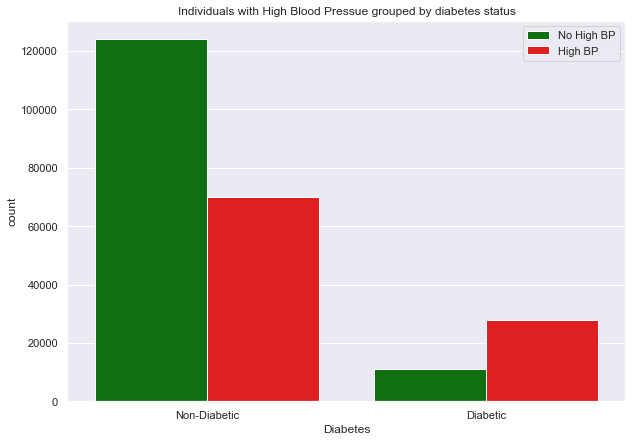

In [82]:
# HighBP

colors = ["#008000","#FF0000"]

ax = sns.countplot(data = df, x = 'Diabetes', hue='HighBP', 
palette = colors)

ax.set(title = 'Individuals with High Blood Pressue grouped by diabetes status')
ax.set_xticklabels(['Non-Diabetic', 'Diabetic'])
ax.legend(['No High BP', 'High BP'])


In [83]:
df_HighBP = df.groupby(["Diabetes", "HighBP"]).size().reset_index(name="Count")

df_HighBP

,Diabetes,HighBP,Count
0,0.0,0.0,124130
1,0.0,1.0,70053
2,1.0,0.0,11205
3,1.0,1.0,27761


##### Smoker

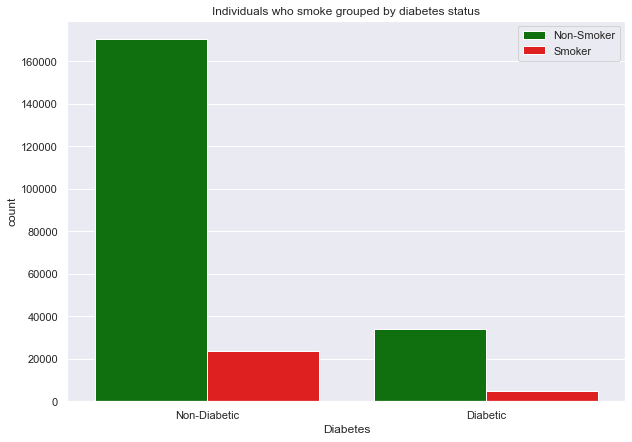

In [84]:
# Smoker

colors = ["#008000","#FF0000"]

ax = sns.countplot(data = df, x = 'Diabetes', hue='Smoker', 
palette = colors)

ax.set(title = 'Individuals who smoke grouped by diabetes status')
ax.set_xticklabels(['Non-Diabetic', 'Diabetic'])
ax.legend(['Non-Smoker', 'Smoker'])


In [85]:
df_Smoker = df.groupby(["Diabetes", "Smoker"]).size().reset_index(name="Count")

df_Smoker

,Diabetes,Smoker,Count
0,0.0,0.0,170619
1,0.0,1.0,23564
2,1.0,0.0,33962
3,1.0,1.0,5004


##### Heavy Alcohol Consumption

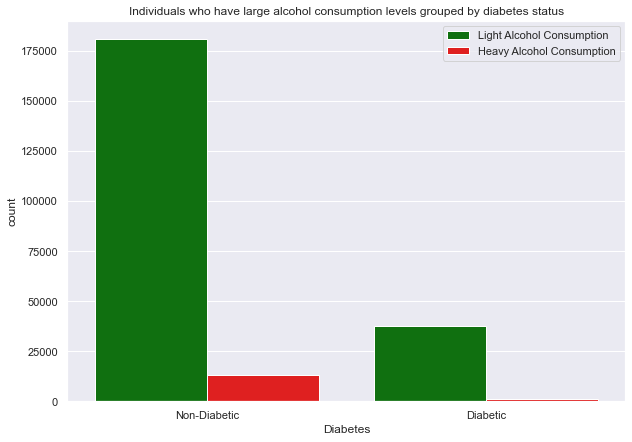

In [86]:
# HvyAlcoholConsump 

colors = ["#008000","#FF0000"]

ax = sns.countplot(data = df, x = 'Diabetes', hue='HvyAlcoholConsump', 
palette = colors)

ax.set(title = 'Individuals who have large alcohol consumption levels grouped by diabetes status')
ax.set_xticklabels(['Non-Diabetic', 'Diabetic'])
ax.legend(['Light Alcohol Consumption', 'Heavy Alcohol Consumption'])

In [87]:
df_HvyAlcoholConsump = df.groupby(["Diabetes", "HvyAlcoholConsump"]).size().reset_index(name="Count")

df_HvyAlcoholConsump

,Diabetes,HvyAlcoholConsump,Count
0,0.0,0.0,180931
1,0.0,1.0,13252
2,1.0,0.0,37769
3,1.0,1.0,1197


##### Physical Activity

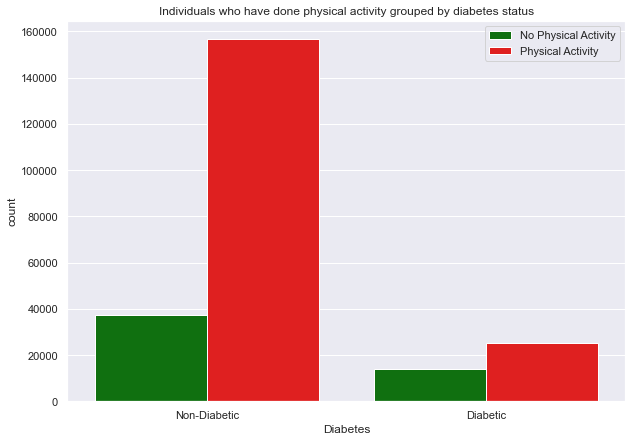

In [88]:
# PhysActivity

colors = ["#008000","#FF0000"]

ax = sns.countplot(data = df, x = 'Diabetes', hue='PhysActivity', 
palette = colors)

ax.set(title = 'Individuals who have done physical activity grouped by diabetes status')
ax.set_xticklabels(['Non-Diabetic', 'Diabetic'])
ax.legend(['No Physical Activity', 'Physical Activity'])

In [89]:
df_PhysActivity = df.groupby(["Diabetes", "PhysActivity"]).size().reset_index(name="Count")

df_PhysActivity

,Diabetes,PhysActivity,Count
0,0.0,0.0,37473
1,0.0,1.0,156710
2,1.0,0.0,13963
3,1.0,1.0,25003


##### Difficulty Walking

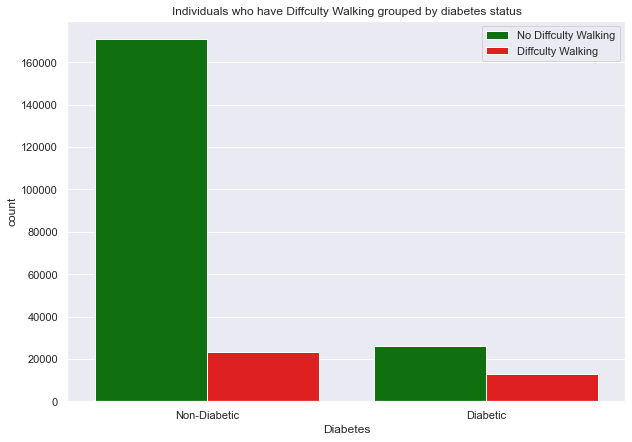

In [90]:
# PhysActivity

colors = ["#008000","#FF0000"]

ax = sns.countplot(data = df, x = 'Diabetes', hue='DiffWalk', 
palette = colors)

ax.set(title = 'Individuals who have Diffculty Walking grouped by diabetes status')
ax.set_xticklabels(['Non-Diabetic', 'Diabetic'])
ax.legend(['No Diffculty Walking', 'Diffculty Walking'])

In [91]:
df_DiffWalk = df.groupby(["Diabetes", "DiffWalk"]).size().reset_index(name="Count")

df_DiffWalk

,Diabetes,DiffWalk,Count
0,0.0,0.0,170998
1,0.0,1.0,23185
2,1.0,0.0,26270
3,1.0,1.0,12696
